> Trabajo: "Creacion del mapa topologico # 2"  
> Autor: Sergio Jacobo Zavaleta

In [1]:
from robots_moviles.topology_library import TopologicalMapProcessor, LinearTopologyOptimizer, GraphIO
import os
from pathlib import Path

/home/ueki/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#### Parametros

In [2]:
BASE_DIR = Path(os.getcwd())
MAP_DIR = BASE_DIR.parent / 'maps' / 'escenario_2.yaml'
RESULT_DIR = 'results/topologico/optimized'
MAP_NUMBER = '2'
GRAPH_DIR = f"{RESULT_DIR}/grafo_optimizado_{MAP_NUMBER}.json.gz"
GRAPH_IMAGE_DIR = f"{RESULT_DIR}/mapa_grafo_optimized_escenario_{MAP_NUMBER}.png"
REPORT_DETAILED_DIR = f"{RESULT_DIR}/grafo_optimizado_detallado_escenario_{MAP_NUMBER}.csv"
REPORT_SIMPLE_DIR = f"{RESULT_DIR}/grafo_optimizado_simple_escenario_{MAP_NUMBER}.csv"
REPORT_SUMMARY_DIR = f"{RESULT_DIR}/grafo_optimizado_resumen_escenario_{MAP_NUMBER}"

#### Crecion del mapa topologico

Primer píxel blanco (esquina casa) en píxeles: (122, 166)


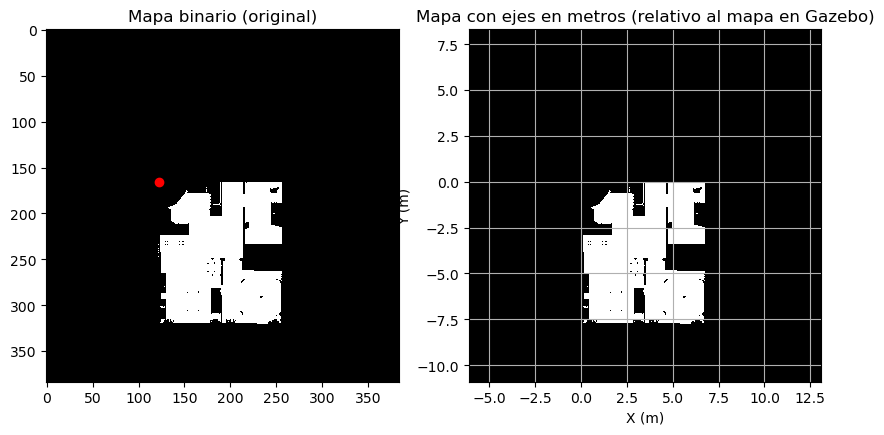

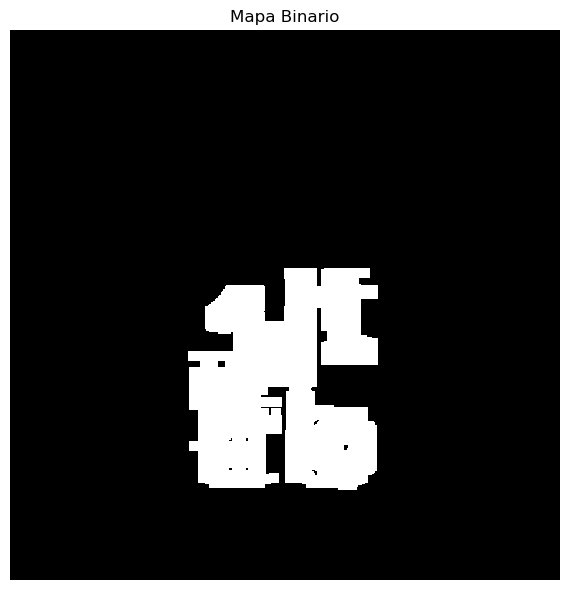

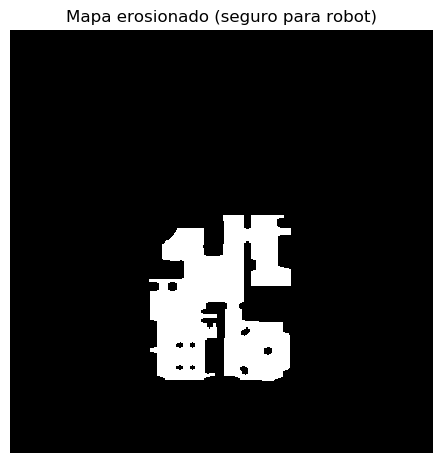

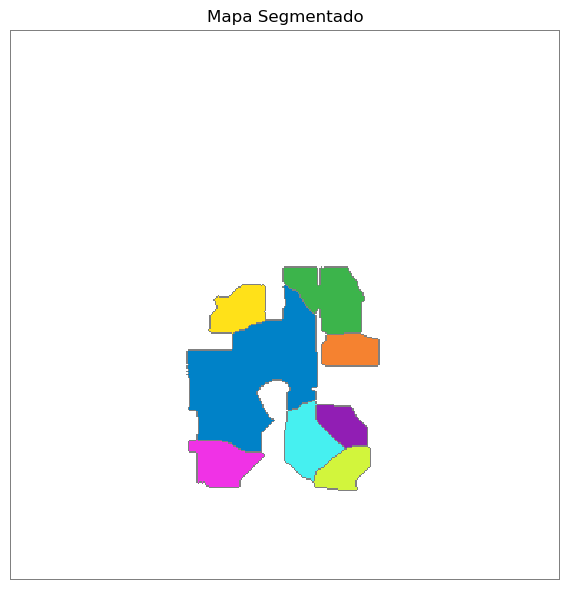

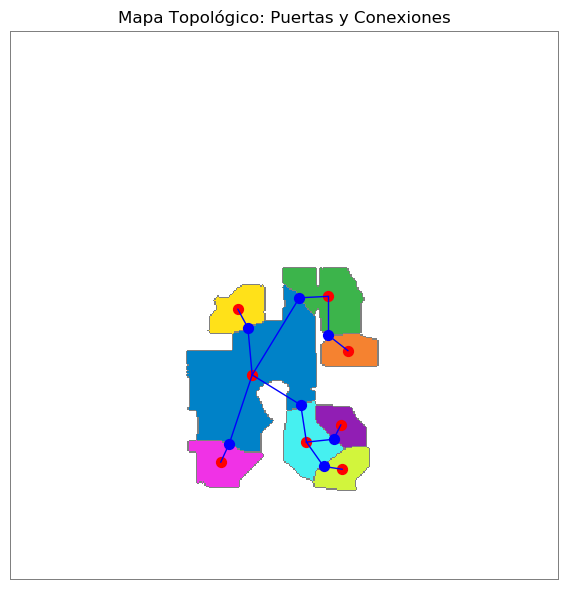

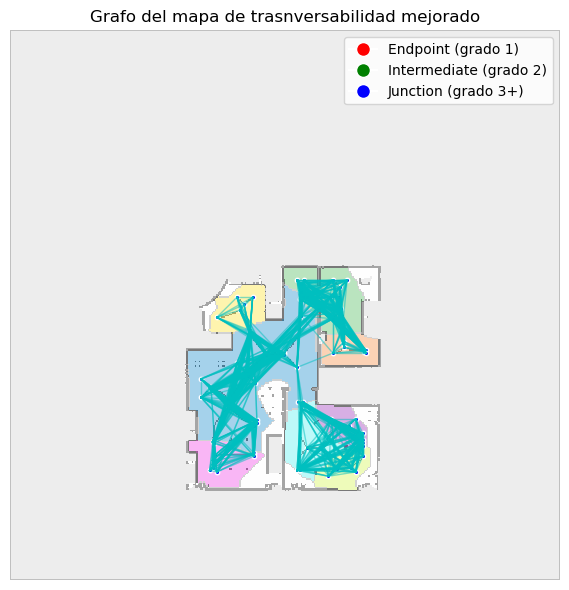

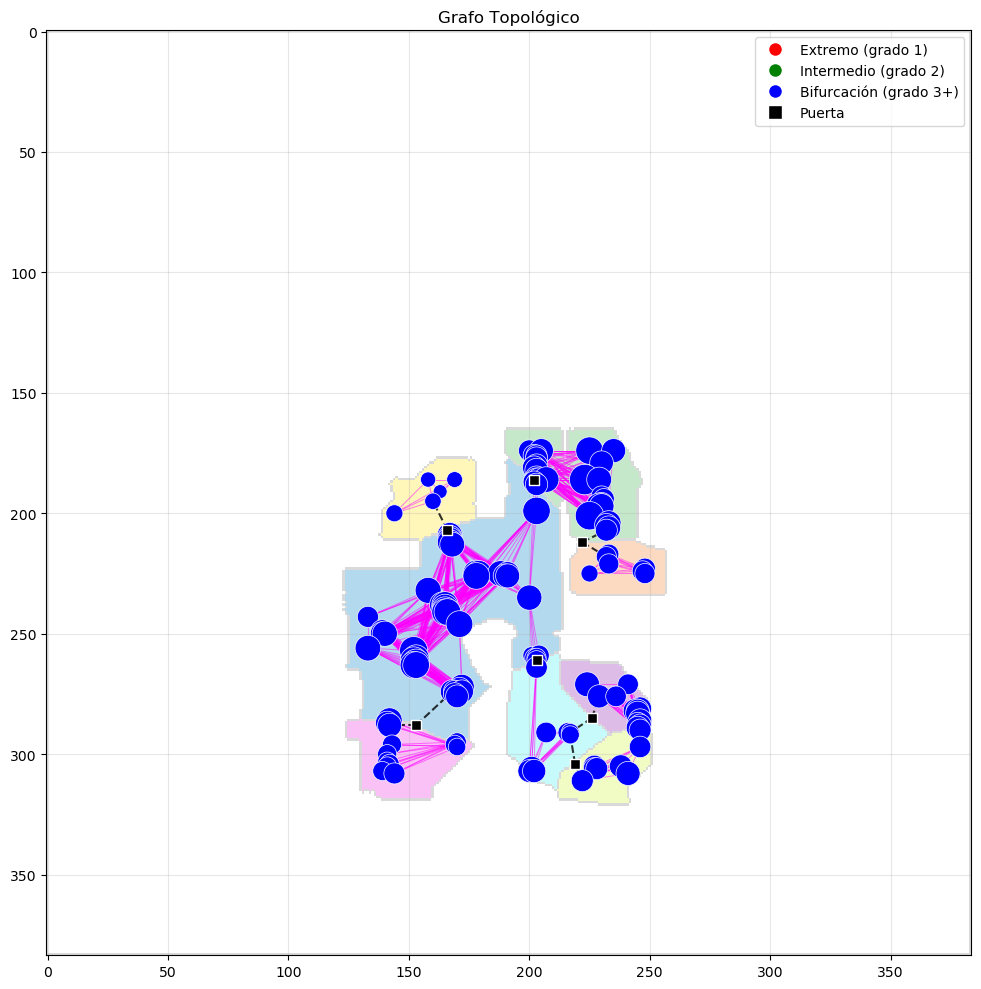

In [16]:
# Configuración de parámetros
config = TopologicalMapProcessor.Config()
# load_and_process_map
config.morph_open_kernel = (7, 7)  # Kernel más grande para menos ruido
config.erode_kernel = (3, 3)  # Erosión más fuerte
config.erode_iterations = 0  # Más erosión para menos ruido
# Erosión considerando el tamaño del robot
config.robot_diametro = 0.3         # Diámetro del robot en metros
config.dilate_robot_iterations = 1   # Iteraciones para dilatación del robot
# segment_map
config.watershed_threshold = 0.5  # Umbral más alto para menos segmentos
config.dilate_iterations = 4  # Menos dilatación para menos segmentos
# extract_voronoi_nodes
config.skeleton_erode_kernel = (13, 13)  # Esqueleto más grueso
# is curvature point
config.curvature_threshold = 0.7  # Umbral de curvatura más alto
# add_strategic_nodes
config.strategic_node_step = 15  # Paso más pequeño para nodos estratégicos
# are nodes connected by skeleton
config.max_gap = 25  # Mayor tolerancia a huecos si existe ruido en el esqueleto
# has direct connection skeleton
config.max_gap_door = 30  # Mayor tolerancia a huecos para puertas que nodos
# build_topological_graph
config.door_connection_threshold = 200  # Menor distancia para conectar puertas
# visualize_sleleton_graph
config.skeleton_node_size = 10  # Nodos más grandes
config.skeleton_line_width = 1  # Líneas más gruesas
config.skeleton_node_size = 10  # Nodos más grandes
# visualize_graph
config.graph_node_size_base = 10  # Tamaño base de nodos más grande
config.graph_node_size_factor = 10 # Factor de tamaño por grado
config.door_node_size = 50  # Tamaño de nodos puerta más grande

# Crear instancia topologica
processor = TopologicalMapProcessor(MAP_DIR,config=config)

# Procesamiento completo
processor.load_and_process_map(f"{RESULT_DIR}/mapa_binario_escenario_{MAP_NUMBER}.png")
processor.segment_map(f"{RESULT_DIR}/mapa_segmentado_escenario_{MAP_NUMBER}.png")
processor.extract_topological_info(f"{RESULT_DIR}/mapa_topologico_escenario_{MAP_NUMBER}.png")
processor.extract_voronoi_nodes(f"{RESULT_DIR}/mapa_transversabilidad_escenario_{MAP_NUMBER}.png")
processor.build_topological_graph()

# Resultados
processor.visualize_graph(f"{RESULT_DIR}/mapa_grafo_escenario_{MAP_NUMBER}.png")

Mostrar reportes

In [17]:
node_report = processor.generate_detailed_node_report(output_file=REPORT_DETAILED_DIR)
region_summary = processor.generate_region_summary(output_file=REPORT_SUMMARY_DIR)
# node_report = processor.generate_detailed_node_report()
# region_summary = processor.generate_region_summary()

Datos de regiones guardados en: results/topologico/optimized/grafo_optimizado_resumen_escenario_2_regions_20250510_210406.csv
Datos generales guardados en: results/topologico/optimized/grafo_optimizado_resumen_escenario_2_general_20250510_210406.csv

Estructura del grafo:
Regiones: 8
Puertas: 7
Nodos: 127
Conexiones internas: 1038
Conexiones a puertas: 14


In [18]:
print("=== Reporte Detallado de Nodos ===")
print(node_report[node_report["region"] == 2])

=== Reporte Detallado de Nodos ===
   node_id      type    x    y   x_m   y_m region  degree  \
0    R2_N0  junction  200  174  3.90 -0.40      2      23   
1    R2_N1  junction  205  174  4.15 -0.40      2      29   
2    R2_N2  junction  225  174  5.15 -0.40      2      38   
3    R2_N3  junction  235  174  5.65 -0.40      2      29   
4    R2_N4  junction  202  176  4.00 -0.50      2      24   
5    R2_N5  junction  203  176  4.05 -0.50      2      22   
6    R2_N6  junction  203  177  4.05 -0.55      2      24   
7    R2_N7  junction  230  179  5.40 -0.65      2      28   
8    R2_N8  junction  203  180  4.05 -0.70      2      25   
9    R2_N9  junction  202  181  4.00 -0.75      2      27   
10  R2_N10  junction  203  182  4.05 -0.80      2      27   
11  R2_N11  junction  203  185  4.05 -0.95      2      25   
12  R2_N14  junction  203  186  4.05 -1.00      2      27   
13  R2_N15  junction  204  186  4.10 -1.00      2      27   
14  R2_N16  junction  207  186  4.25 -1.00      2 

In [19]:
print("\n=== Resumen por Región ===")
print(region_summary)


=== Resumen por Región ===
   region_id  num_nodes  avg_degree  num_endpoints  num_junctions  \
0          2         27   28.518519              0             27   
1          3          5   11.800000              0              5   
2          4         46   30.391304              0             46   
3          5          7   19.571429              0              7   
4          7          9   21.777778              0              9   
5          6         13   25.769231              0             13   
6          8         13   20.384615              0             13   
7          9          7   24.857143              0              7   

   num_intermediate associated_doors    centroid  
0                 0           D0, D2  (222, 185)  
1                 0               D1  (159, 194)  
2                 0   D0, D1, D3, D5  (169, 240)  
3                 0               D2  (236, 223)  
4                 0       D3, D4, D6  (207, 287)  
5                 0               D4  (231, 

In [20]:
# Después de haber procesado el mapa y generado el esqueleto
simple_report = processor.generate_simple_skeleton_report(output_file=REPORT_SIMPLE_DIR)

# Acceder a los datos
print("=== Nodos del esqueleto ===")
print(simple_report["nodes"][simple_report["nodes"]["region"] == 2])

print("\n=== Conexiones del esqueleto ===")
print(simple_report["connections"][simple_report["connections"]["node1"] == 2])

=== Nodos del esqueleto ===
    node_id    x    y      type  degree  region
0         0  200  174  junction      23       2
1         1  205  174  junction      29       2
2         2  225  174  junction      38       2
3         3  235  174  junction      29       2
4         4  202  176  junction      24       2
5         5  203  176  junction      22       2
6         6  203  177  junction      24       2
7         7  230  179  junction      28       2
8         8  203  180  junction      25       2
9         9  202  181  junction      27       2
10       10  203  182  junction      27       2
11       11  203  185  junction      25       2
14       14  203  186  junction      27       2
15       15  204  186  junction      27       2
16       16  207  186  junction      33       2
17       17  223  186  junction      47       2
18       18  229  186  junction      31       2
22       22  230  193  junction      22       2
23       23  231  194  junction      21       2
25       25 

#### Grafo optimizado: Lineal

In [21]:
# Uso de la clase LinearTopologyOptimizer
original_graph = processor.graph

# Configuración
config = LinearTopologyOptimizer.Config()
config.keep_doors=True          # Siempre mantener nodos puerta
config.keep_endpoints=True      # Mantener nodos finales
config.min_node_degree=2        # Nodos con grado >= 2
config.connection_radius=30.0   # Radio de conexión ajustado
config.min_path_length=2        # Caminos de al menos 3 nodos
config.merge_aligned_nodes=True # Fusionar nodos alineados
config.alignment_tolerance=10.0 # Tolerancia de 10 grados
config.min_line_length=20.0     # Líneas de al menos 40px
config.max_merge_distance=10.0   # Fusionar nodos a <15px


# Optimización
linear_optimizer = LinearTopologyOptimizer(original_graph, config)
linear_graph = linear_optimizer.optimize()

# Verificación
print(f"Nodos: {len(linear_graph['nodes'])}")
print(f"Conexiones: {len(linear_graph['edges'])}")

Nodos: 36
Conexiones: 40


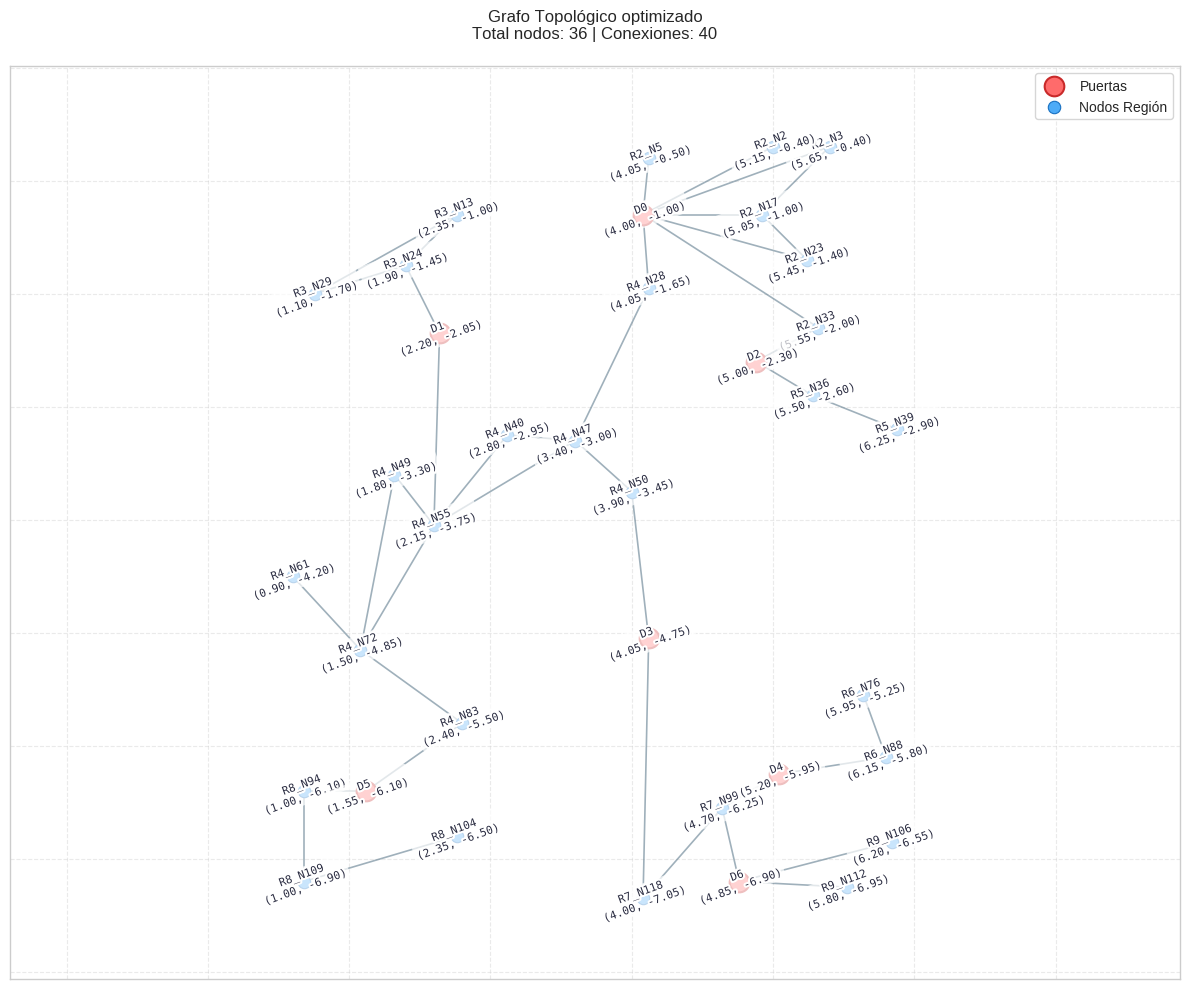

In [ ]:
# Crear instancia de GraphIO
graph_io = GraphIO()
graph_io.visualize_graph(linear_graph,path=GRAPH_IMAGE_DIR)

In [ ]:
# Guardar grafo optimizado
graph_io.save_graph(linear_graph, file_path=GRAPH_DIR)

# Opcional (para máxima compatibilidad con objetos Python)
# graph_io.save_graph_pickle(linear_graph, f"results/topologico/optimized/grafo_optimizado_{MAP_NUMBER}.pkl")